In [68]:
import tensorflow as tf
import keras as K
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from IPython.display import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [69]:
classifier = Sequential()

In [70]:
classifier.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation='relu'))

In [71]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [72]:
classifier.add(Conv2D(32,(3,3), activation='relu'))

In [73]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [74]:
classifier.add(Flatten())

In [75]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units= 1, activation = 'sigmoid'))

In [76]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip= True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [78]:
training_set = train_datagen.flow_from_directory('../DeepLearningBook-master/Cap47/dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('../DeepLearningBook-master/Cap47/dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [79]:
classifier.fit(training_set,
               steps_per_epoch = 8000,
               epochs = 5,
               validation_data = validation_set,
               validation_steps = 2000)

Epoch 1/5
8000/8000 [==============================] - 63s 8ms/step - loss: 0.6264 - accuracy: 0.6381


1/1 [==============================] - 0s 19ms/step


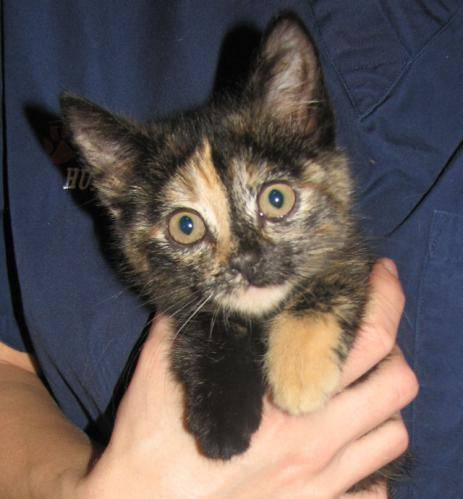

In [85]:
test_image = tf.keras.utils.load_img('../DeepLearningBook-master/Cap47/dataset_teste/2551.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

prediction
tf.keras.utils.load_img(path='../DeepLearningBook-master/Cap47/dataset_teste/2551.jpg')